In [4]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [5]:
# Import nltk library for text processing
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
nltk.download('punkt')
nltk.download('vader_lexicon')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\ELCOT\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\ELCOT\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [6]:
# Create a sentiment analyzer object
sia = SentimentIntensityAnalyzer()

In [7]:
# Define a function to categorize the compound score
def categorize_sentiment(compound):
    thresholds = {
        'humor': 0.8,
        'praise': 0.6,
        'gratitude': 0.4,
        'excitement': 0.2,
        'fair': -0.2,
        'sad': -0.4,
        'jealous': -0.6,
        'hate': -0.8,
    }
    for sentiment, threshold in thresholds.items():
        if compound >= threshold:
            return sentiment
    return 'anger'

In [8]:
# Load the dataset
df = pd.read_csv("sentiment.csv") 
df.head()

,Text,Sentiment
0,I love this product!,Positive
1,"Terrible experience, never buying again.",Negative
2,The weather today is okay.,Neutral
3,This movie is fantastic!,Positive
4,Disappointed with the service.,Negative


In [10]:
# Iterate over the rows of the DataFrame
for index, row in df.iterrows():
    # Get the text from the row
    text = row['Text']
    # Get the sentiment score of the text
    scores = sia.polarity_scores(text)
    # Get the compound score of the text
    compound = scores['compound']
    # Call the categorize_sentiment function to get the sentiment category
    category = categorize_sentiment(compound)
    # Print the text and the category
    print(f"The text: {text}")
    print(f"The category: {category}")

The text: I love this product!
The category: praise
The text: Terrible experience, never buying again.
The category: jealous
The text: The weather today is okay.
The category: excitement
The text: This movie is fantastic!
The category: gratitude
The text: Disappointed with the service.
The category: jealous
The text: Enjoying my vacation so far.
The category: gratitude
The text: The food was mediocre at best.
The category: praise
The text: This book is a waste of time.
The category: jealous
The text: Can't complain about the quality.
The category: excitement
The text: Worst customer support ever!
The category: jealous
The text: It's an average phone, nothing special.
The category: sad
The text: The concert was amazing!
The category: praise
The text: Not impressed by the presentation.
The category: sad
The text: The hotel was clean and comfortable.
The category: praise
The text: Feeling indifferent about the new update.
The category: fair
The text: This coffee tastes awful.
The category

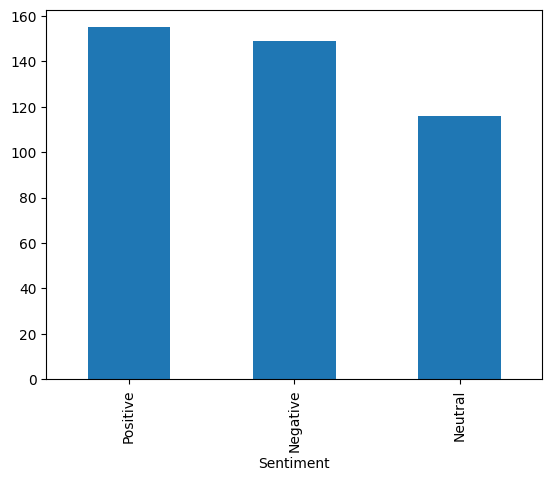

In [11]:
# Explore the data
df['Sentiment'].value_counts().plot(kind='bar')
plt.show()

In [12]:
# Split the data into train and test sets
X = df['Text']
y = df['Sentiment']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [13]:
# Filter the positive texts from the test set
positive_texts = X_test[y_test == 1]

In [14]:
# Get the categories for the positive texts
positive_categories = [categorize_sentiment(sia.polarity_scores(text)['compound']) for text in positive_texts]

In [15]:
# Print some examples of positive texts and their categories
print("Positive texts and their categories:")
for text , category in zip(positive_texts.iloc[:10],positive_categories[:10]):
    print( text , ":", category)

Positive texts and their categories:


In [16]:
# Vectorize the text using CountVectorizer
vectorizer = CountVectorizer()
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

In [17]:
# Train a Multinomial Naive Bayes classifier
clf = MultinomialNB()
clf.fit(X_train_vec, y_train)

MultinomialNB()

In [18]:
# Make predictions on the test set
y_pred = clf.predict(X_test_vec)

In [19]:
# Print some examples of each case
print("\nTrue negatives:")
for i in np.where((y_test == 0) & (y_pred == 0))[0][:5]:
    print(X_test.iloc[i], ":", y_test.iloc[i])

print("\nTrue positives:")
for i in np.where((y_test == 1) & (y_pred == 1))[0][:5]:
    print(X_test.iloc[i], ":", y_test.iloc[i])

print("\nFalse negatives:")
for i in np.where((y_test == 1) & (y_pred == 0))[0][:5]:
    print(X_test.iloc[i], ":", y_test.iloc[i])

print("\nFalse positives:")
for i in np.where((y_test == 0) & (y_pred == 1))[0][:5]:
    print(X_test.iloc[i], ":", y_test.iloc[i])


True negatives:

True positives:

False negatives:

False positives:


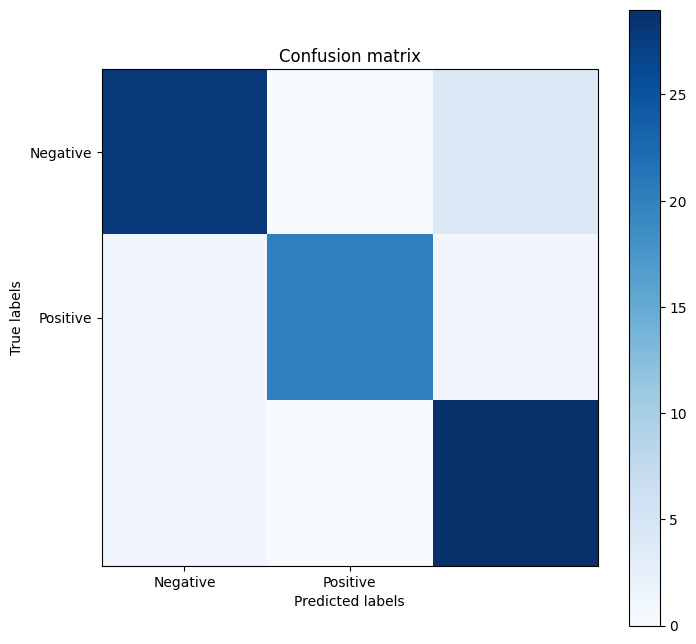

In [20]:
# Plot the confusion matrix
cm = confusion_matrix(y_test, y_pred)
print()
plt.figure(figsize=(8,8))
plt.imshow(cm, cmap='Blues')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.xticks([0, 1], ['Negative', 'Positive'])
plt.yticks([0, 1], ['Negative', 'Positive'])
plt.title('Confusion matrix')
plt.colorbar()

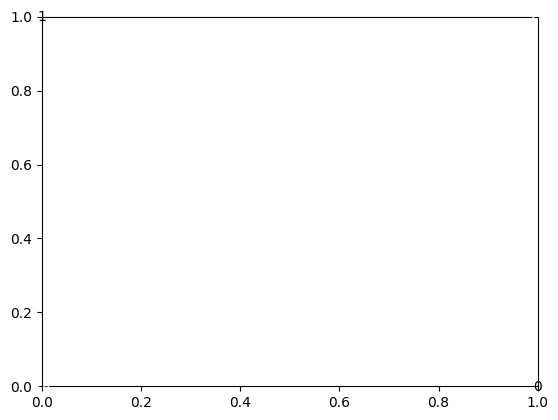

In [21]:
# Add annotations to show the values of the matrix
for i in range(2):
    for j in range(2):
        plt.text(j, i, cm[i, j], ha='center', va='center', color='white' if cm[i, j] > cm.max() / 2 else 'black')
plt.show()

In [22]:
# Evaluate the model performance
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification report:\n", classification_report(y_test, y_pred))

Accuracy: 0.9166666666666666
Confusion matrix:
 [[28  0  4]
 [ 1 20  1]
 [ 1  0 29]]
Classification report:
               precision    recall  f1-score   support

    Negative       0.93      0.88      0.90        32
     Neutral       1.00      0.91      0.95        22
    Positive       0.85      0.97      0.91        30

    accuracy                           0.92        84
   macro avg       0.93      0.92      0.92        84
weighted avg       0.92      0.92      0.92        84

